In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
youtube = pd.read_csv('/Users/muhammadramzy/Documents/PWDK/USvideos.csv')

In [3]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


In [4]:
youtube.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


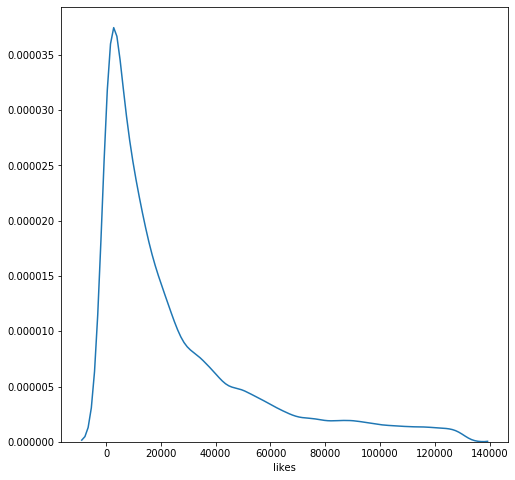

In [5]:
#Filtering the data based on the outlier of the likes column
Q1_like = youtube['likes'].describe()['25%']
Q3_like = youtube['likes'].describe()['75%']
IQR = Q3_like - Q1_like

plt.figure(figsize = (8,8))
sns.distplot(youtube[(youtube['likes'] >= Q1_like - (1.5*IQR)) & (youtube['likes'] <= Q3_like + (1.5 * IQR))]['likes'], hist = False)

out_like = youtube[(youtube['likes'] >= Q1_like - (1.5*IQR)) & (youtube['likes'] <= Q3_like + (1.5 * IQR))]['likes'].index

In [6]:
#Change to datetime. Figure out how to get the day difference

In [8]:
#Tweak the data so it could be converted into datetime
youtube['trending_date'] = youtube['trending_date'].apply(lambda x: '{}.{}.{}'.format(x[3:5],x[6:],x[0:2]))
youtube['publish_time'] = youtube['publish_time'].apply(lambda x: x[:10])

In [9]:
youtube['trending_date'] = pd.to_datetime(youtube['trending_date'])
youtube['publish_time'] = pd.to_datetime(youtube['publish_time'])

In [10]:
pd.to_datetime(youtube['trending_date'])

0       2017-11-14
1       2017-11-14
3       2017-11-14
5       2017-11-14
6       2017-11-14
           ...    
40940   2018-06-14
40941   2018-06-14
40944   2018-06-14
40945   2018-06-14
40946   2018-06-14
Name: trending_date, Length: 35813, dtype: datetime64[ns]

In [11]:
pd.to_datetime(youtube['publish_time'])

0       2017-11-13
1       2017-11-13
3       2017-11-13
5       2017-11-13
6       2017-11-12
           ...    
40940   2018-05-18
40941   2018-05-18
40944   2018-05-18
40945   2018-05-18
40946   2018-05-18
Name: publish_time, Length: 35813, dtype: datetime64[ns]

In [12]:
(youtube['trending_date'] - youtube['publish_time'])

0        1 days
1        1 days
3        1 days
5        1 days
6        2 days
          ...  
40940   27 days
40941   27 days
40944   27 days
40945   27 days
40946   27 days
Length: 35813, dtype: timedelta64[ns]

In [13]:
#Create a new column called Trending Gap which is a days difference between the Trending Date and the Publishing Time
youtube['trending_gap'] = youtube['trending_date'] - youtube['publish_time']
youtube['trending_gap'] = youtube['trending_gap'].apply(lambda x: x.days) 

In [14]:
youtube['trending_gap']

0         1
1         1
3         1
5         1
6         2
         ..
40940    27
40941    27
40944    27
40945    27
40946    27
Name: trending_gap, Length: 35813, dtype: int64

In [15]:
#Here I create new column for the total character from the title and the description
youtube['title_total_word'] = youtube['title'].apply(lambda x: len(x))
youtube['description_total_word'] = youtube['description'].apply(lambda x: len(str(x)))

Text(0.5, 1.0, 'Trending Gap')

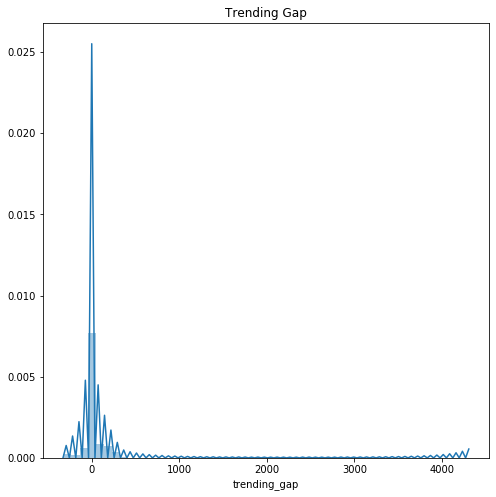

In [16]:
#Create a new column called Trending Gap which is a days difference between the Trending Date and the Publishing Time
plt.figure(figsize = (8,8))
sns.distplot(youtube_not['trending_gap'])
plt.title('Trending Gap')

Text(0.5, 1.0, 'Title Total Word')

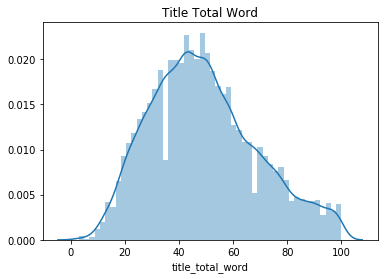

In [17]:
#jumlah karakter Title
sns.distplot(youtube_not['title_total_word'])
plt.title('Title Total Word')

Text(0.5, 1.0, 'Description Total Word')

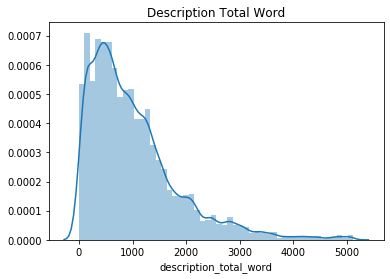

In [18]:
#jumlah karakter Description
sns.distplot(youtube_not['description_total_word'])
plt.title('Description Total Word')

<Figure size 576x576 with 0 Axes>

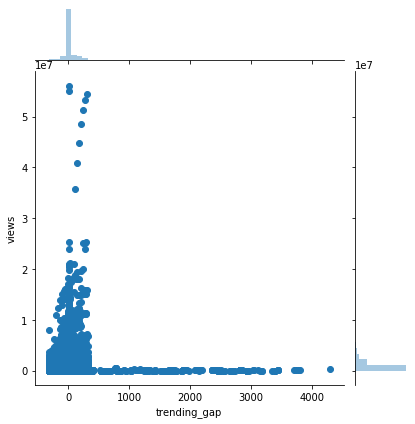

In [19]:
plt.figure(figsize = (8,8))
sns.jointplot(data = youtube_not, x = 'trending_gap', y = 'views')

<Figure size 576x576 with 0 Axes>

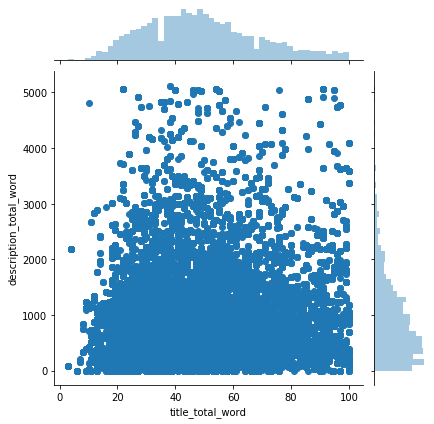

In [20]:
plt.figure(figsize = (8,8))
sns.jointplot(data = youtube_not, x = 'title_total_word', y = 'description_total_word')

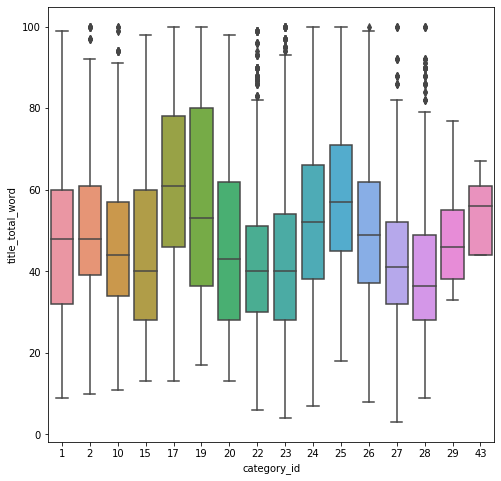

In [21]:
plt.figure(figsize = (8,8))
sns.boxplot(x = 'category_id', y = 'title_total_word', data = youtube_not)

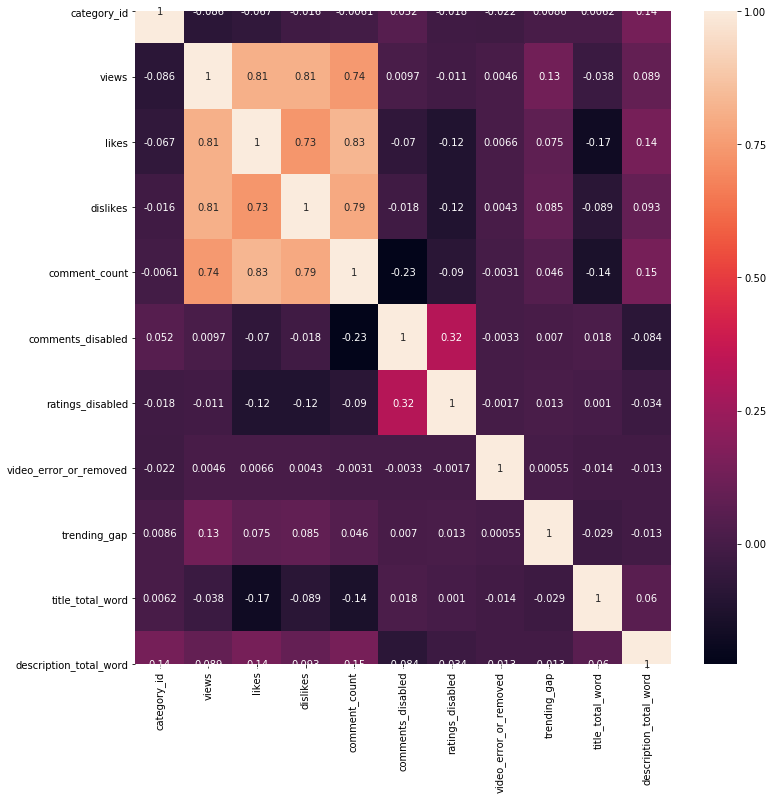

In [22]:
plt.figure(figsize = (12,12))
sns.heatmap(youtube_not.corr('spearman'), annot = True)

In [23]:
# I create a new column called like_delta, which basically differences of number between likes and disilikes
youtube['like_delta'] = youtube['likes'] - youtube['dislikes']

In [24]:
youtube[youtube['like_delta'] == 0]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,like_delta
192,wRGldR_SQAA,17.14.11,Apple Clips sample,Steve Kovach,22,2017-11-09T18:01:04.000Z,[none],2259,0,0,0,https://i.ytimg.com/vi/wRGldR_SQAA/default.jpg,False,False,False,Clips 2.0 lets you use augmented reality and s...,0
1435,Kn5UgGQukYQ,17.21.11,Breaking Bad's Bryan Cranston on Meeting Charl...,hudsonunionsociety,1,2016-10-14T21:14:51.000Z,"Breaking Bad|""Bryan Cranston""|""malcom in the m...",15058,0,0,0,https://i.ytimg.com/vi/Kn5UgGQukYQ/default.jpg,True,True,False,The Hudson Union www.hudsonunionsociety.com is...,0
1667,Kn5UgGQukYQ,17.22.11,Breaking Bad's Bryan Cranston on Meeting Charl...,hudsonunionsociety,1,2016-10-14T21:14:51.000Z,"Breaking Bad|""Bryan Cranston""|""malcom in the m...",34207,0,0,0,https://i.ytimg.com/vi/Kn5UgGQukYQ/default.jpg,True,True,False,The Hudson Union www.hudsonunionsociety.com is...,0
1868,_akwfRuL4os,17.23.11,Highlights of the EA predatory behavior announ...,chris lee,22,2017-11-21T19:29:03.000Z,[none],160012,0,0,1722,https://i.ytimg.com/vi/_akwfRuL4os/default.jpg,False,True,False,The State of Hawaii announces action to addres...,0
1914,Kn5UgGQukYQ,17.23.11,Breaking Bad's Bryan Cranston on Meeting Charl...,hudsonunionsociety,1,2016-10-14T21:14:51.000Z,"Breaking Bad|""Bryan Cranston""|""malcom in the m...",36137,0,0,0,https://i.ytimg.com/vi/Kn5UgGQukYQ/default.jpg,True,True,False,The Hudson Union www.hudsonunionsociety.com is...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28135,UwbO_xb1-Xo,18.05.04,"KKW BEAUTY: Conceal, Bake, Brighten with Mario...",Kim Kardashian West,22,2018-03-21T18:42:04.000Z,"Mario Dedivanovic|""KKW BEAUTY""|""CONCEALER""|""CO...",1040664,0,0,0,https://i.ytimg.com/vi/UwbO_xb1-Xo/default.jpg,True,True,False,"Watch me conceal, bake and brighten with Mario...",0
28346,UwbO_xb1-Xo,18.06.04,"KKW BEAUTY: Conceal, Bake, Brighten with Mario...",Kim Kardashian West,22,2018-03-21T18:42:04.000Z,"Mario Dedivanovic|""KKW BEAUTY""|""CONCEALER""|""CO...",1045731,0,0,0,https://i.ytimg.com/vi/UwbO_xb1-Xo/default.jpg,True,True,False,"Watch me conceal, bake and brighten with Mario...",0
28550,9TUBf6l7FBg,18.14.04,Coachella 2018 LIVE Channel 1,Coachella,10,2018-04-05T06:48:28.000Z,[none],3598220,0,0,0,https://i.ytimg.com/vi/9TUBf6l7FBg/default_liv...,False,True,False,For more cameras and VR180 immersive experienc...,0
28751,9TUBf6l7FBg,18.15.04,Coachella 2018 LIVE Channel 1,Coachella,10,2018-04-05T06:48:28.000Z,[none],11137071,0,0,2,https://i.ytimg.com/vi/9TUBf6l7FBg/default_liv...,False,True,False,For more cameras and VR180 immersive experienc...,0


## Question

Why do you think there is a trend video that did not had no difference at all between the number of the likes and dislikes? Is there any interesting pattern from the data you could find? Show it with the data and visual if you find it interesting

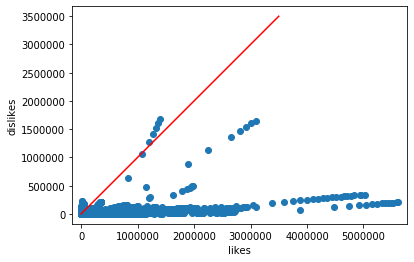

In [25]:
plt.scatter(x='likes', y='dislikes', data=youtube)
plt.xlabel('likes')
plt.ylabel('dislikes')
plt.axis('equal')
plt.plot([0,3500000],[0,3500000],'r')

In [26]:
youtube[(youtube['dislikes']>youtube['likes']) & (youtube['dislikes']>50000)]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,like_delta
6201,8d_202l55LU,17.15.12,The FCC repeals its net neutrality rules,Washington Post,25,2017-12-14T18:49:06.000Z,"fcc net neutrality|""breaking news video""|""vide...",985179,4870,110707,19843,https://i.ytimg.com/vi/8d_202l55LU/default.jpg,False,False,False,Federal regulators vote to allow Internet prov...,-105837
6410,8d_202l55LU,17.16.12,The FCC repeals its net neutrality rules,Washington Post,25,2017-12-14T18:49:06.000Z,"fcc net neutrality|""breaking news video""|""vide...",1192501,5707,126649,23426,https://i.ytimg.com/vi/8d_202l55LU/default.jpg,False,False,False,Federal regulators vote to allow Internet prov...,-120942
6421,8I_NkJ8VTEI,17.16.12,Judge Roy Moore Campaign Statement,Roy Moore for Senate,22,2017-12-14T03:04:05.000Z,[none],708489,3960,54061,0,https://i.ytimg.com/vi/8I_NkJ8VTEI/default.jpg,True,False,False,"December 13, 2017 | Montgomery, Alabama",-50101
6621,8d_202l55LU,17.17.12,The FCC repeals its net neutrality rules,Washington Post,25,2017-12-14T18:49:06.000Z,"fcc net neutrality|""breaking news video""|""vide...",1242998,5884,130836,23297,https://i.ytimg.com/vi/8d_202l55LU/default.jpg,False,False,False,Federal regulators vote to allow Internet prov...,-124952
6631,8I_NkJ8VTEI,17.17.12,Judge Roy Moore Campaign Statement,Roy Moore for Senate,22,2017-12-14T03:04:05.000Z,[none],753386,4167,57285,0,https://i.ytimg.com/vi/8I_NkJ8VTEI/default.jpg,True,False,False,"December 13, 2017 | Montgomery, Alabama",-53118
6856,8d_202l55LU,17.18.12,The FCC repeals its net neutrality rules,Washington Post,25,2017-12-14T18:49:06.000Z,"fcc net neutrality|""breaking news video""|""vide...",1263104,5930,132439,23543,https://i.ytimg.com/vi/8d_202l55LU/default.jpg,False,False,False,Federal regulators vote to allow Internet prov...,-126509
6871,8I_NkJ8VTEI,17.18.12,Judge Roy Moore Campaign Statement,Roy Moore for Senate,22,2017-12-14T03:04:05.000Z,[none],773357,4234,58327,0,https://i.ytimg.com/vi/8I_NkJ8VTEI/default.jpg,True,False,False,"December 13, 2017 | Montgomery, Alabama",-54093
7109,8I_NkJ8VTEI,17.19.12,Judge Roy Moore Campaign Statement,Roy Moore for Senate,22,2017-12-14T03:04:05.000Z,[none],781487,4280,58726,0,https://i.ytimg.com/vi/8I_NkJ8VTEI/default.jpg,True,False,False,"December 13, 2017 | Montgomery, Alabama",-54446
7116,LFhT6H6pRWg,17.19.12,PSA from Chairman of the FCC Ajit Pai,Daily Caller,22,2017-12-13T22:52:57.000Z,"thedc|""dc""|""washington dc""|""washington""|""the d...",1142585,9100,218841,28013,https://i.ytimg.com/vi/LFhT6H6pRWg/default.jpg,False,False,False,Ajit Pai has been at the heart of the net neut...,-209741
7357,LFhT6H6pRWg,17.20.12,PSA from Chairman of the FCC Ajit Pai,Daily Caller,22,2017-12-13T22:52:57.000Z,"thedc|""dc""|""washington dc""|""washington""|""the d...",1179072,9368,224152,29063,https://i.ytimg.com/vi/LFhT6H6pRWg/default.jpg,False,False,False,Ajit Pai has been at the heart of the net neut...,-214784


# New

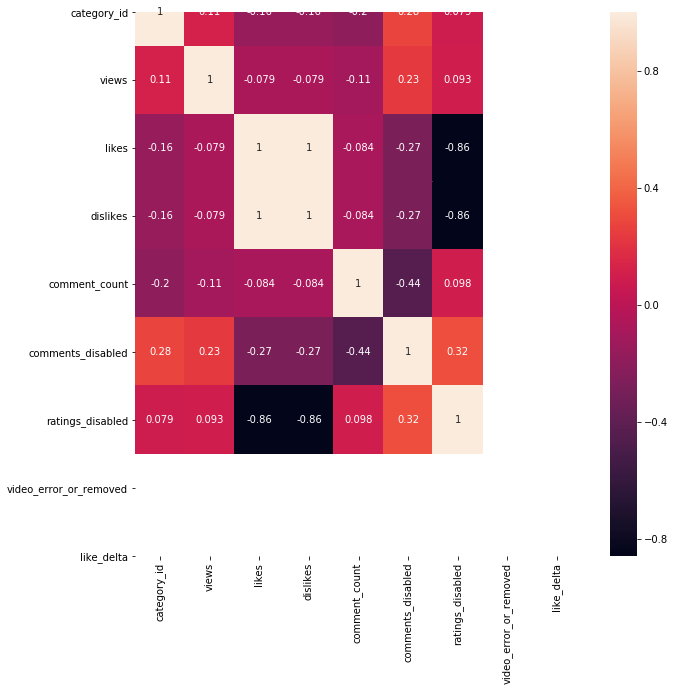

In [32]:
youtube_0_delta = youtube[youtube['like_delta']==0]
plt.figure(figsize=(10,10))
sns.heatmap(youtube_0_delta.corr(),annot=True)

In [35]:
youtube

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,like_delta
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,54561
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",91039
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,140694
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,9506
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,130246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,36775
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,59626
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,47036
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,190111
